In [875]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("gabungan90.xlsx")

df.head()

,Unnamed: 0,Tweet_tokens_stemmed,Polarity,Sentiment
0,0,[],0.000000,neutral
1,1,"['kait', 'revisi', 'hap', 'kayak', 'cuma', 'is...",0.166667,positive
2,2,"['urus', 'basic', 'rakyat', 'tidak', 'becus', ...",0.000000,neutral
3,3,"['wkwkwkk', 'uasny', 'logika', 'nalar', 'hukum...",0.000000,neutral
4,4,"['fenomena', 'stempel', 'kadrun', 'pakai', 'ka...",0.000000,neutral


In [876]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            778 non-null    int64  
 1   Tweet_tokens_stemmed  778 non-null    object 
 2   Polarity              778 non-null    float64
 3   Sentiment             778 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 24.4+ KB


In [877]:
np.sum(df.isnull().any(axis=1))

0

In [878]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   4
Count of rows in the data is:   778


In [879]:
df['Sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [880]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   4
Count of rows in the data is:   778


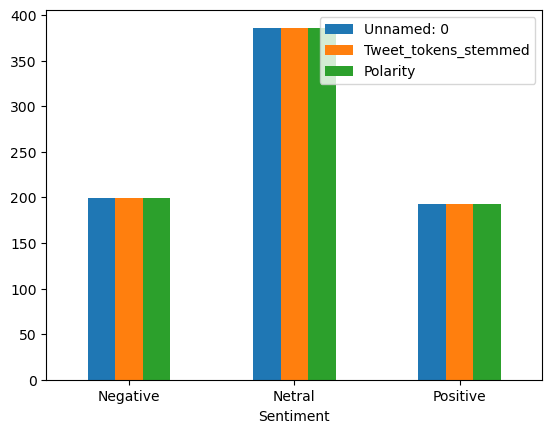

In [881]:
# Plotting the distribution for dataset.
ax = df.groupby('Sentiment').count().plot(kind='bar')
ax.set_xticklabels(['Negative','Netral','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['Tweet_tokens_stemmed']), list(df['Sentiment'])

In [882]:
data=df[['Tweet_tokens_stemmed','Sentiment']]
X=data.Tweet_tokens_stemmed
y=data.Sentiment

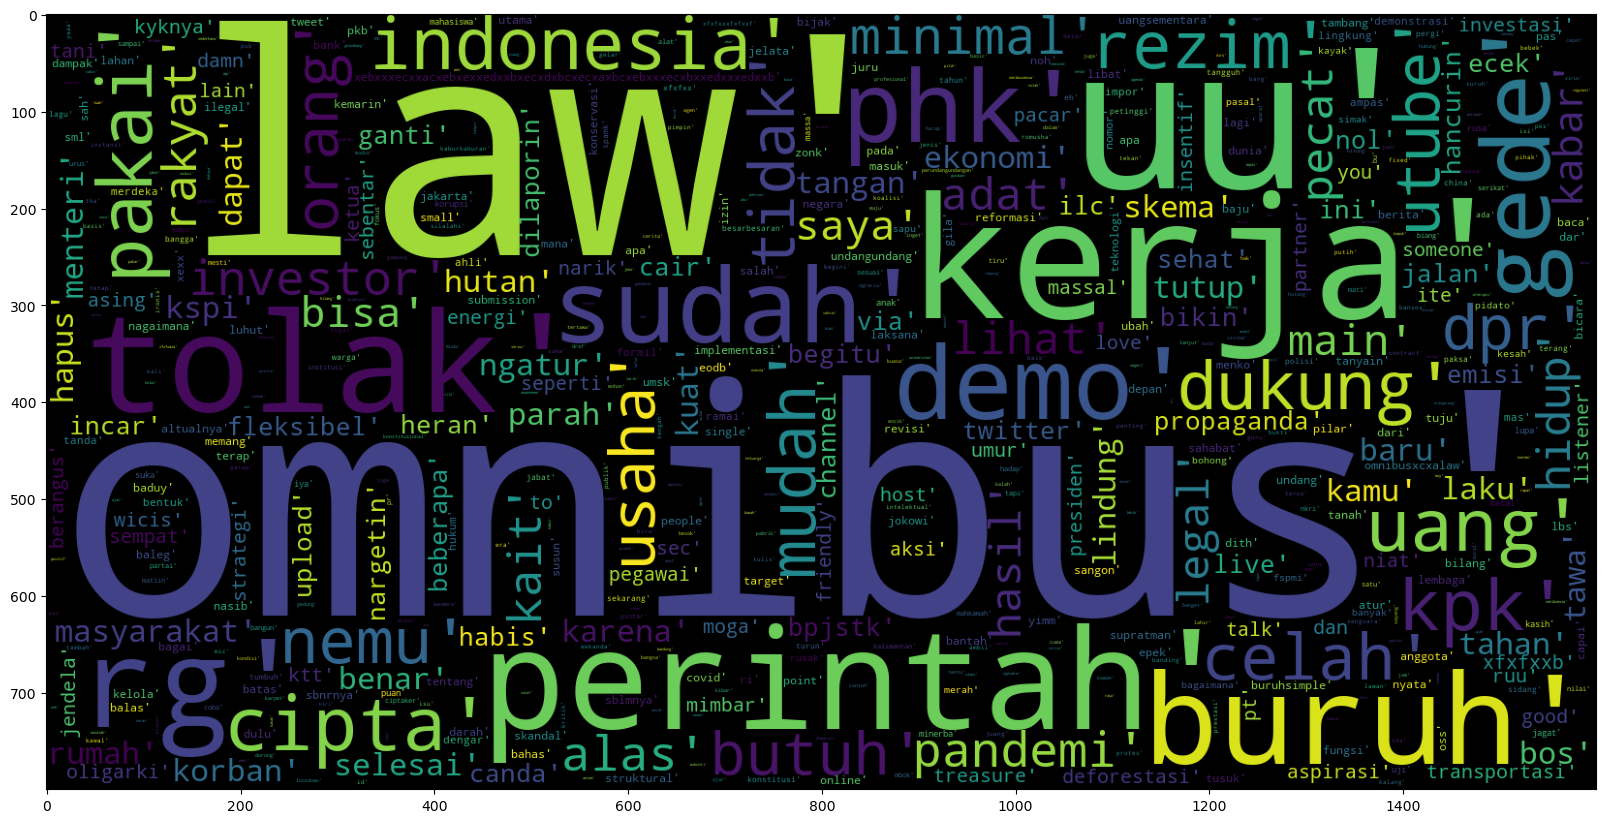

In [883]:
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data_neg = data['Tweet_tokens_stemmed'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

### Classification

#### Support Vector Machine (SVM)

In [884]:
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [885]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  4838


In [886]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [887]:
from sklearn.metrics import confusion_matrix

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [888]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

confusion_matrix(y_train, y_train_pred)

array([[132,  20,   0],
       [  0, 315,   0],
       [  0,   8, 147]], dtype=int64)

In [889]:
confusion_matrix(y_test, y_test_pred)

array([[42,  5,  0],
       [ 0, 70,  1],
       [ 0,  1, 37]], dtype=int64)

In [890]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
preds = SVCmodel.predict(X_test)
print (classification_report(y_test, preds))
print (confusion_matrix(y_test, preds))

print("Training Accuracy :", SVCmodel.score(X_test, y_test))

              precision    recall  f1-score   support

    negative       0.98      0.94      0.96        47
     neutral       0.95      0.97      0.96        71
    positive       0.97      0.97      0.97        38

    accuracy                           0.96       156
   macro avg       0.97      0.96      0.96       156
weighted avg       0.96      0.96      0.96       156

[[44  3  0]
 [ 1 69  1]
 [ 0  1 37]]
Training Accuracy : 0.9615384615384616


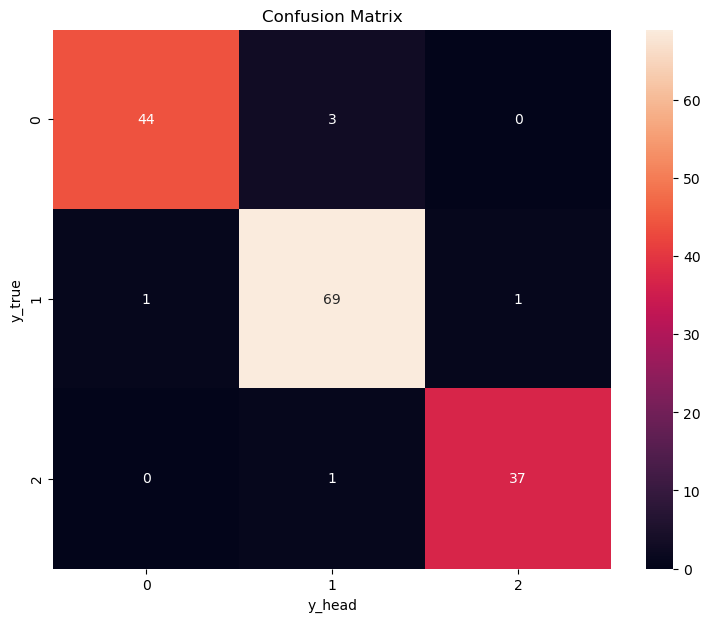

In [891]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(9,7))
sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt=".0f", ax=ax)
plt.title('Confusion Matrix')
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

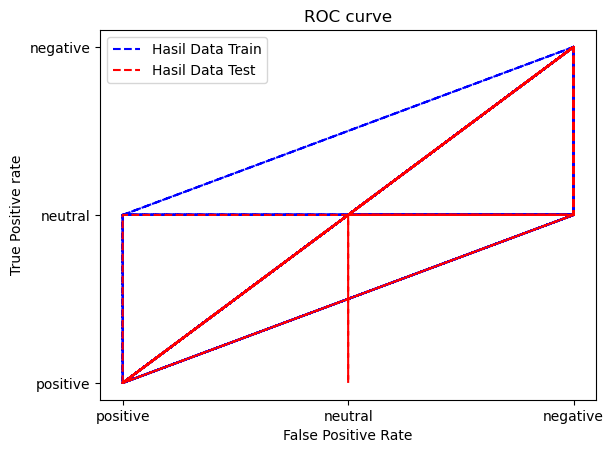

In [892]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('default')

# plot roc curves
plt.plot(y_train, y_train_pred, linestyle='--',color='Blue', label='Hasil Data Train')
plt.plot(y_test, y_test_pred, linestyle='--',color='Red', label='Hasil Data Test')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [893]:
df['Sentiment'].value_counts()

neutral     386
negative    199
positive    193
Name: Sentiment, dtype: int64